# 커널 서포트 벡터 머신
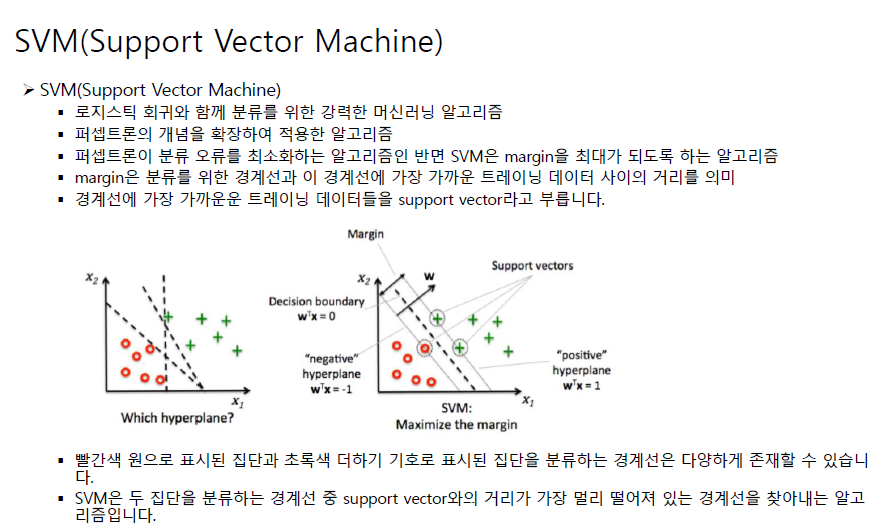



경계선이 다양하게 그려질 수 있는데 여러 경계선들 중 경계선에 가장 가까운 거리들을 계산해서 그 거리가 최대화 되는 경계선을 찾아주는 알고리즘이다 => 경계선과의 거리가 멀수록 예측력이 높아짐 !

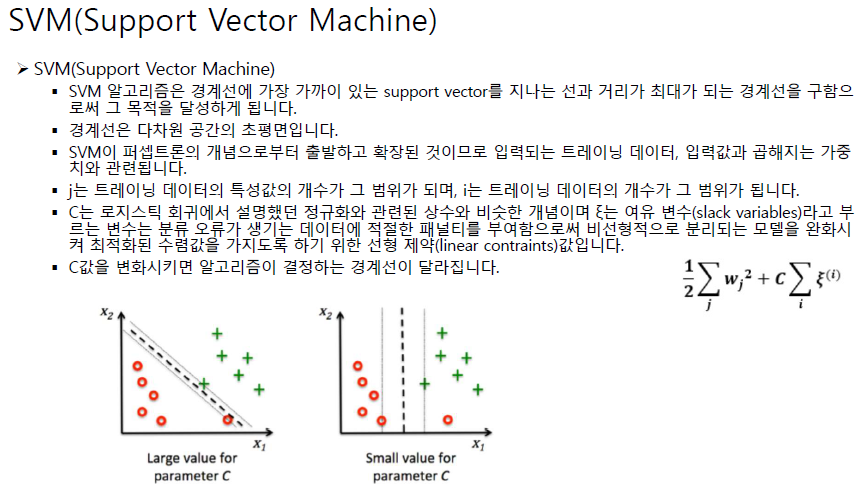

In [ ]:
가중치를 곱함에 따라 경계선이 달라지기 때문에 "가중치"가 중요하다

선형 모델을 유연하게 만드는 방법 : 특성끼리 곱하거나, 특성을 거듭제곱하는 식으로 새로운 특성을 추가하여
    단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것

* 선형적으로 분류되지 않는 클래스를 가진 이진 데이터셋을 만들어보자

Text(0, 0.5, 'feature 1')

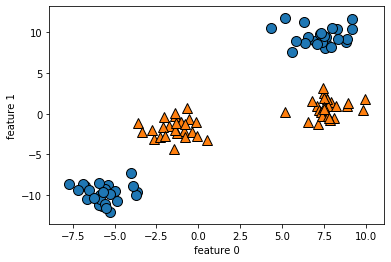

In [6]:
# make_blobs : 모의데이터를 생성해주는 함수
# regression : 선형 /  classifier :  분류 / blobs : 군집
# centers = 4 : 군집 개수가 4개 
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

X,y = make_blobs(centers=4, random_state=8)
y = y % 2 # 0/1로만 남도록
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

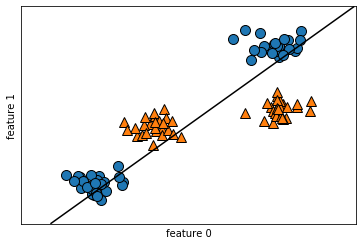

In [10]:
# 분류를 위한 선형 모델을 그려보자

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
# 선형 모델로는 데이터를 제대로 분류하지 못한다 !!!!!!

Text(0.5, 0, 'feature1 ** 2')

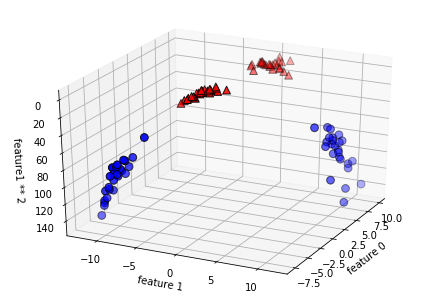

In [24]:
# 두번째 특성을 제곱한 특성으로 새로운 특성을 추가해서 입력 특성을 확장해보자
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

X_new = np.hstack([X, X[:,1:]**2])

# Axes3D parameter 값 설정
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim=-26)


mask = y == 0
# s : scalar or array_like
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask, 2], c="r", marker="^", cmap = mglearn.cm2, s=60, edgecolor="k")
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature 1 ** 2')

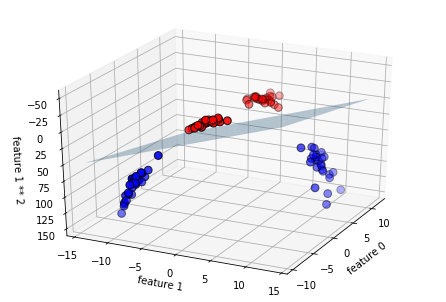

In [25]:
# 학습을 시킨다
linear_svm_3d = LinearSVC().fit(X_new, y)
# ravel ?????????????????
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
# 2을 왜 빼고 더하는지?????
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

# meshgrid의 역할?
XX, YY = np.meshgrid(xx, yy)
# zz는 왜 이렇게 계산하는지?
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# plot_surface의 parameter 조정
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
# mask 와 ~mask값이 정확히 뭔지?
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c="b", cmap=mglearn.cm2, s= 60, edgecolor="k")
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2],
           c="r", cmap = mglearn.cm2, s=60, edgecolor="k")
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

Text(0, 0.5, 'feature 1')

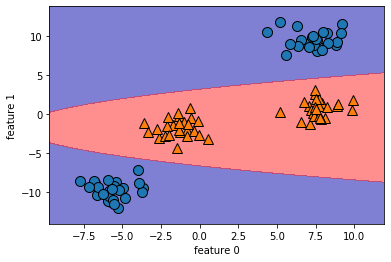

In [26]:
#선형SVM 모델은 직선이 아닌 타원에 가까운 분류 경계를 찾아줌
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

데이터셋에 비선형 특성을 추가하여 더 강력한 선형 모델을 만들 수 있다
커널 기법을 이용해서 새로운 특성을 많이 만들지 않고 분류기 학습이 가능하다
* 커널 기법 : 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인터들의 거리를 계산
1. 다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산 (예: 특성1**2+ 특성**5) 
2. 가우시안 커널  : 차원이 무한한 특성 공간에 매핑되도록 계산, 모든 차수의 모든 다항식을 고려한다

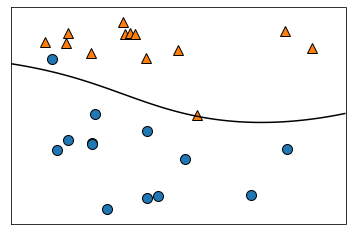

In [31]:
from sklearn.svm import SVC
# 두 개의 클래스를 가진 2차원 데이터셋에 SVM으로 학습
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)   
#gamma는 가우시안 커널의 폭을 제어하는 매개변수
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)

Text(0.5, 0, 'feature 1')

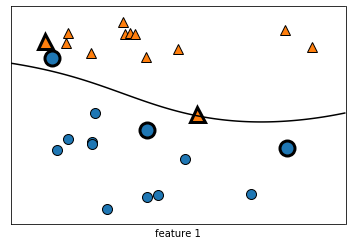

In [34]:
# 두 개의 클래스를 가진 2차원 데이터셋에 SVM으로 학습
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)   
#gamma는 가우시안 커널의 폭을 제어하는 매개변수
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)

sv = svm.support_vectors_  #서포트 벡트들
sv_labels = svm.dual_coef_.ravel() > 0   
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
mglearn.discrete_scatter(sv[:,0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.xlabel("feature 1")